In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv("GermanCredit.csv")
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,no,yes,1
996,... < 100 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,...,building society savings agreement/life insurance,40,none,own,1,management/self-employed/highly qualified empl...,1,yes,yes,1
997,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,... >= 7 years,4,male : single,none,...,car or other,38,none,own,1,skilled employee/official,1,no,yes,1
998,... < 100 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,...,unknown/no property,23,none,for free,1,skilled employee/official,1,yes,yes,0


In [7]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [9]:
y = df['credit_risk']
X = df.drop('credit_risk',axis=1)
X.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee/official,1,yes,yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee/official,1,no,yes
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,no,yes
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes


In [28]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True,dtype="int")

X.head()


,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,status_... >= 200 DM / salary for at least 1 year,status_0 <= ... < 200 DM,status_no checking account,...,property_unknown/no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,telephone_yes,foreign_worker_yes
0,6,1169,4,4,67,2,1,False,False,False,...,False,True,False,True,False,True,False,False,True,True
1,48,5951,2,2,22,1,1,False,True,False,...,False,True,False,True,False,True,False,False,False,True
2,12,2096,2,3,49,1,2,False,False,True,...,False,True,False,True,False,False,False,True,False,True
3,42,7882,2,4,45,1,2,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,24,4870,3,4,53,2,2,False,False,False,...,True,True,False,False,False,True,False,False,False,True


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (800, 48)
Testing data: (200, 48)


In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [16]:
# Predictions
y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]


In [17]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.71

Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.47      0.49        60
           1       0.78      0.81      0.80       140

    accuracy                           0.71       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.70      0.71      0.71       200



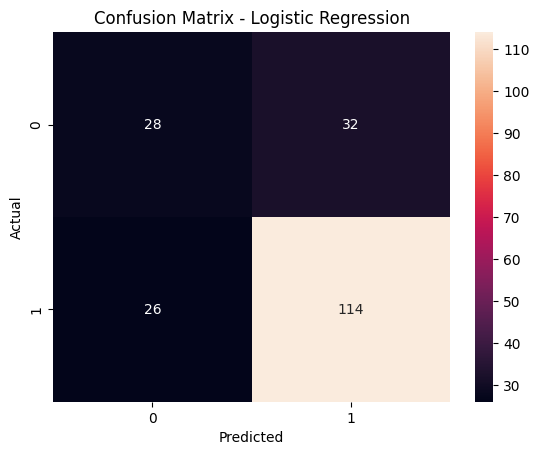

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


ROC-AUC Score: 0.7514285714285714


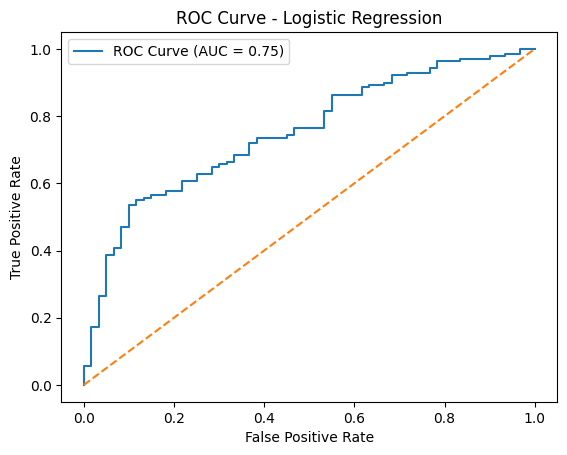

In [19]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [20]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.695

Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.22      0.30        60
           1       0.73      0.90      0.81       140

    accuracy                           0.69       200
   macro avg       0.60      0.56      0.55       200
weighted avg       0.65      0.69      0.65       200



In [21]:
# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.755

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.33      0.45        60
           1       0.77      0.94      0.84       140

    accuracy                           0.76       200
   macro avg       0.73      0.63      0.65       200
weighted avg       0.74      0.76      0.72       200



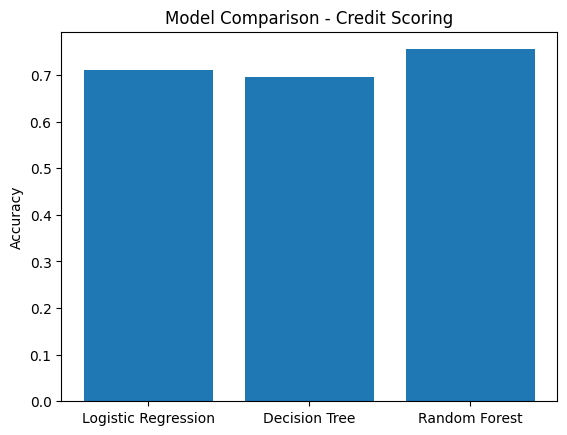

In [22]:
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracies = [accuracy, dt_accuracy, rf_accuracy]

plt.figure()
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison - Credit Scoring")
plt.show()


In [23]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
9,status_no checking account,0.115322
1,amount,0.113274
0,duration,0.092527
4,age,0.078537
2,installment_rate,0.033735
10,credit_history_critical account/other credits ...,0.032054
3,present_residence,0.031406
14,purpose_car (new),0.026323
39,other_installment_plans_none,0.023599
15,purpose_car (used),0.021763


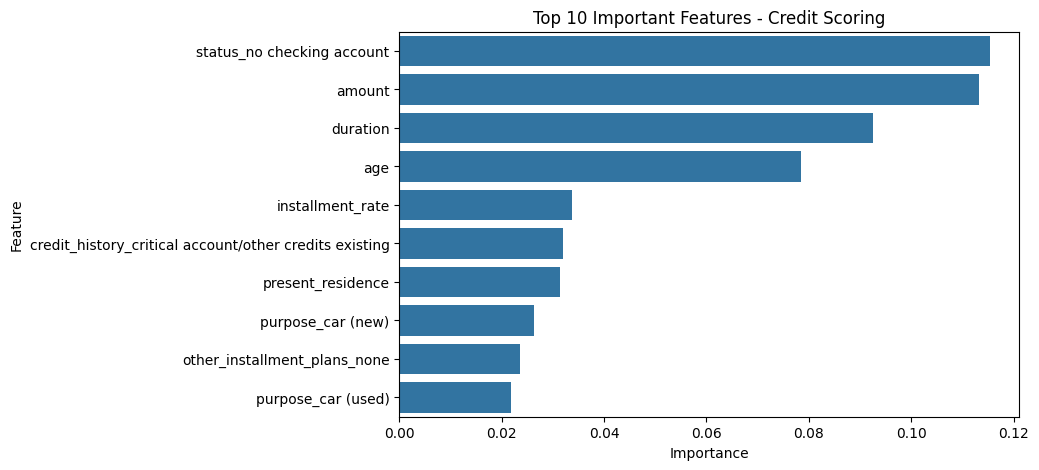

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(10)
)
plt.title("Top 10 Important Features - Credit Scoring")
plt.show()


In [25]:
import pickle

# Save model
with open("credit_scoring_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model & scaler saved successfully!")


Model & scaler saved successfully!
